### Finite size scaling for ground state energy density of the 2d Hubbard model on square lattice

In [1]:
import numpy as np
import matplotlib
from time import time
import matplotlib.pyplot as plt

__Contains the electronic dispersion__ $\epsilon_{\mathbf{k}}=-2t(\cos k_{x}+\cos k_{y})$

In [2]:
from Electrons import Electrons

__Defining the momentum space grid__

In [3]:
ti=time()
N = 1024
intvl = np.pi/N
dk = 1
kx, ky = intvl*np.mgrid[slice(0, N+dk, dk),slice(0, N+dk, dk)]
k = (kx,ky)
electrons = Electrons()
Ek = np.float64(-2*(np.cos(kx)+np.cos(ky)))
W = 8 

__Generating the Fermi surface for the electronic dispersion $\epsilon_{\mathbf{k}}=-2t(\cos k_{x}+\cos k_{y})$__ at $\mu =0$ $\Rightarrow$ $k_{Fx}+k_{Fy}=\pi$

In [4]:
fig, ax0 = plt.subplots(ncols=1)
plt.close(fig)

__Construction of isogeometric curves parallel to the Fermi surface $\mathbf{k}_{\Lambda\hat{s}}=\mathbf{k}_{F\hat{s}}+\Lambda\hat{s}$__
represented by the dashed($--$) line

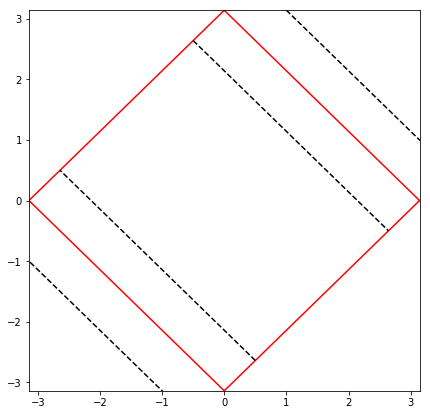

In [5]:
plt.rcParams['figure.figsize'] = [7,7]
kFx=np.linspace(0,np.pi,100)
kFy=np.pi-np.linspace(0,np.pi,100)
plt.plot(kFx,kFy,color='r')
plt.plot(kFx,-kFy,color='r')
plt.plot(-kFx,-kFy,color='r')
plt.plot(-kFx,kFy,color='r')
plt.plot(kFx+0.5,kFy+0.5,color='k',linestyle='--')
plt.plot(kFx-0.5,kFy-0.5,color='k',linestyle='--')
plt.plot(-kFx+0.5,-kFy+0.5,color='k',linestyle='--')
plt.plot(-kFx-0.5,-kFy-0.5,color='k',linestyle='--')
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
Lambda0=np.pi/np.sqrt(2)
plt.show()

In [6]:
#we set the initial distance from the fermi surface as...
Lambda0 = 0.257 
#At every RG step the states farthest from the Fermi energy are disentangled 
#first followed by the next and so on.

### At Half Filling
__This function constructs the Fermi surface of different sizes and then constructs the isogeometric curves. After performing the RG the ground state energy is computed__

In [7]:
def process(N,RGsteps):
	
	intvl = np.pi/N
	dk = 1
	kx, ky = intvl*np.mgrid[slice(0, N+dk, dk),slice(0, N+dk, dk)]
	
        #make the lattice
	k = (kx,ky)
	#Call the class electrons(e)
	electrons = Electrons()
	Ek = np.float64(-2*(np.cos(kx)+np.cos(ky)))
	#bandwidth	
	W = 8 
	#Show the Fermi surface(F) and the volume it bounds
	cs = ax0.contour(k[0][:-1,:-1]+(intvl/2.)*dk,k[1][:-1,:-1]+(intvl/2.)*dk,Ek[:-1,:-1],levels=[0],colors='red') 
	#Call axes artist to get the coordinates identify the Fermi surface(F) wavefront(wvf)
	F = cs.collections[0].get_paths()[0]
	# (F) curve
	kx,ky,k,Ek=np.nan,np.nan,np.nan,np.nan
	cs=np.nan
	coordsF = F.vertices
	#transpose (F) curve
	coordsF_T = np.flip(coordsF,axis = 1)
	#Vel. vec. vF at (F)
	vF = electrons.vk(coordsF)
	vF_T = electrons.vk(coordsF_T)
	vFmag = vF[:,0]*vF[:,0]+vF[:,1]*vF[:,1]
	shatF  = vF/np.transpose([vFmag]) 
	#Fermi surface angular coordinates, choosing the X=Y symmetry and plotting one part
	thetaF0 =  np.float64(np.arctan(vF[:,1]/vF[:,0])) 
	thetaF = thetaF0[thetaF0>=np.pi/4]
	#making a list of offsets around the Fermi surface from 0 to $\Lambda_{0}$
	lambdaF = Lambda0*np.linspace(0.99,1,RGsteps+1)
	#making a mesh out of the wave fronts in curvilinear coords thetaF,lambdaF
	ThetaF,LambdaF = np.meshgrid(thetaF,lambdaF)
	coordsFx_irr = coordsF[:,0][thetaF0>=np.pi/4]
	coordsFy_irr = coordsF[:,1][thetaF0>=np.pi/4]
	Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
	Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
	Fwvfx_in  = coordsFy_irr-LambdaF*np.cos(ThetaF) 
	Fwvfy_in  = coordsFx_irr-LambdaF*np.sin(ThetaF) 
		
	Fwvfy_out[Fwvfy_out>np.pi] = np.pi
	Fwvfy_out[Fwvfy_out<0] = 0
	Fwvfx_out[Fwvfx_out>np.pi] = np.pi
	Fwvfx_out[Fwvfx_out<0] = 0
	Fwvfy_in[Fwvfy_in>np.pi] = np.pi
	Fwvfy_in[Fwvfy_in<0] = 0
	Fwvfx_in[Fwvfx_in>np.pi] = np.pi
	Fwvfx_in[Fwvfx_in<0] = 0
	Fwvf_out = (Fwvfx_out,Fwvfy_out)
	Fwvf_in = (Fwvfx_in,Fwvfy_in)

#Getting the electronic dispersion for outgoing (wvf) around (F)-pair 1
	EkFwvf_out = electrons.Ek(Fwvf_out)
#Getting the electronic disperfsion for incoming (wvf) around (F)-pair 1	
	EkFwvf_in = electrons.Ek(Fwvf_in)
	U0 = 8./(N)
	omegaSat =2*(EkFwvf_out[:,len(thetaF)-1]-EkFwvf_in[:,len(thetaF)-1]).max()
	invGgapped = omegaSat - 2*(EkFwvf_out[:,len(thetaF)-1]  -EkFwvf_in[:,len(thetaF)-1])
	invGint = invGgapped - U0
	lambdaEm = lambdaF[np.argmin(invGint>0)]
	renV = omegaSat-2*EkFwvf_out[:,len(thetaF)-1][lambdaF==lambdaEm]+2*EkFwvf_in[:,len(thetaF)-1][lambdaF==lambdaEm]
	energyPerParticle = -renV*lambdaEm*lambdaEm*N
	print("System size, Energy per particle",N,energyPerParticle)
	return energyPerParticle

In [ ]:
N_latt = np.array([256,512,1024,2048,4096,8192,16384,32768])
RGstepL = np.array([1000,1000,1000,1000,1000,1000,10000,10000])
energyGSperParticle = np.asarray([process(N,RGstepL[N_latt==N]) for N in N_latt])

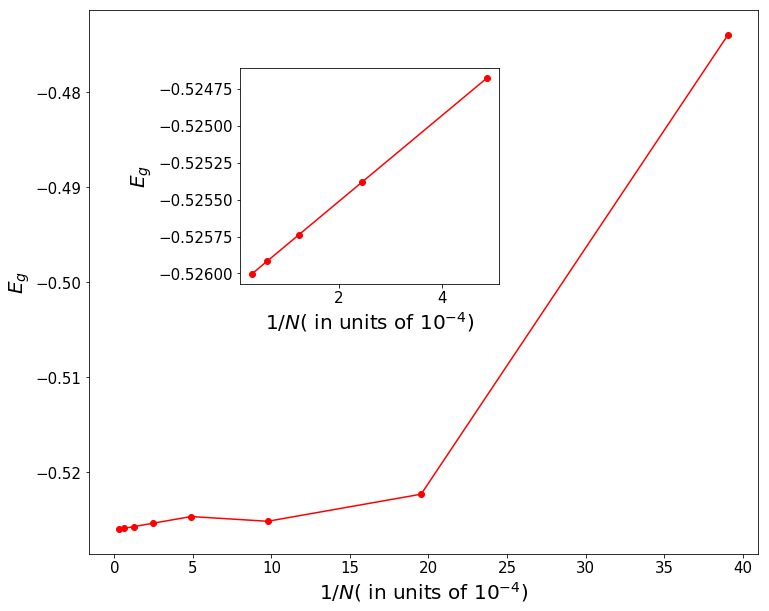

In [12]:
fig, ax = plt.subplots()
left, bottom, width, height = [0.3, 0.5, 0.3, 0.3]
plt.rcParams['figure.figsize'] = [12,10]
ax1 = fig.add_axes([left, bottom, width, height])
#plot for ground-state-energy per particle with inverse square root lattice size  	
ax.plot((1/N_latt)/10**(-4),energyGSperParticle, color='red',marker='o')
ax1.plot((1/N_latt[3:8])/10**(-4), energyGSperParticle[3:8],color='red',marker='o')
ax.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax.set_xlabel(r'$1/N$( in units of $10^{-4}$)',fontsize=20)
ax.set_ylabel(r'$E_{g}$',fontsize=20)
ax1.set_xlabel(r'$1/N$( in units of $10^{-4}$)',fontsize=20)
ax1.set_ylabel(r'$E_{g}$',fontsize=20)
plt.show()

__This computes the energy density and filling as a function of system size__

In [13]:
def detEnergyAndFilling(Kc, Ks, mu, Nstar,N):
	Karr = np.linspace(0,Nstar,Nstar+1).astype(int)
	nArr = np.asarray([np.linspace(0,2*K,2*K+1).astype(int) for K in Karr])
	EArr =0.0*nArr
	for j in range(len(nArr)):
		nK = nArr[j]
		K = int((np.shape(nK)[0]-1)/2)   
		for k in range(len(nK)):
			#0<K<Nstar, 0=<l=<2Nstar-2K, -l=<p=<l, 0=<n=<2K, -n=<m=<n 
			EArr[j][k] = -Ks*(Nstar-K)*(Nstar-K) +(Kc/2.)*(nK[k]*(nK[k]+1)-2*K*(K+1)) + mu*nK[k]
	EminK = np.zeros(np.shape(EArr))
	fillK = np.zeros(np.shape(EArr))
	for l in range(len(nArr)):
		EminK[l] = np.min(EArr[l])
		fillK[l] = nArr[l][np.argmin(EArr[l])]
	return np.min(EminK)/N, fillK[np.argmin(EminK)]/(2*N)

In [21]:
#Effective chemical potential corresponding to n=0.1245 doping
mu1 = -1.997

__This function constructs the Fermi surface of different sizes and then constructs the isogeometric curves. After performing the RG the ground state energy is computed__

In [32]:
fig, ax0 = plt.subplots(ncols=1)
def process(N,RGsteps):
	
	intvl = np.pi/N
	dk = 1
	kx, ky = intvl*np.mgrid[slice(0, N+dk, dk),slice(0, N+dk, dk)]
	
        #make the lattice
	k = (kx,ky)
	#Call the class electrons(e)
	electrons = Electrons()
	Ek = np.float64(-2*(np.cos(kx)+np.cos(ky)))
	#bandwidth	
	W = 8 
	#Show the Fermi surface(F) and the volume it bounds
	cs = ax0.contour(k[0][:-1,:-1]+(intvl/2.)*dk,k[1][:-1,:-1]+(intvl/2.)*dk,Ek[:-1,:-1],levels=[0],colors='red') 
	#Call axes artist to get the coordinates identify the Fermi surface(F) wavefront(wvf)
	F = cs.collections[0].get_paths()[0]
	# (F) curve
	kx,ky,k,Ek=np.nan,np.nan,np.nan,np.nan
	cs=np.nan
	coordsF = F.vertices
	#transpose (F) curve
	coordsF_T = np.flip(coordsF,axis = 1)
	#Vel. vec. vF at (F)
	vF = electrons.vk(coordsF)
	vF_T = electrons.vk(coordsF_T)
	vFmag = vF[:,0]*vF[:,0]+vF[:,1]*vF[:,1]
	shatF  = vF/np.transpose([vFmag]) 
	#Fermi surface angular coordinates, choosing the X=Y symmetry and plotting one part
	thetaF0 =  np.float64(np.arctan(vF[:,1]/vF[:,0])) 
	thetaF = thetaF0[thetaF0>=np.pi/4]
	#making a list of offsets around the Fermi surface from 0 to $\Lambda_{0}$
	lambdaF = Lambda0*np.linspace(0,1,RGsteps+1)
	#making a mesh out of the wave fronts in curvilinear coords thetaF,lambdaF
	ThetaF,LambdaF = np.meshgrid(thetaF,lambdaF)
	coordsFx_irr = coordsF[:,0][thetaF0>=np.pi/4]
	coordsFy_irr = coordsF[:,1][thetaF0>=np.pi/4]
	Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
	Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
	Fwvfx_in  = coordsFy_irr-LambdaF*np.cos(ThetaF) 
	Fwvfy_in  = coordsFx_irr-LambdaF*np.sin(ThetaF) 
		
	Fwvfy_out[Fwvfy_out>np.pi] = np.pi
	Fwvfy_out[Fwvfy_out<0] = 0
	Fwvfx_out[Fwvfx_out>np.pi] = np.pi
	Fwvfx_out[Fwvfx_out<0] = 0
	Fwvfy_in[Fwvfy_in>np.pi] = np.pi
	Fwvfy_in[Fwvfy_in<0] = 0
	Fwvfx_in[Fwvfx_in>np.pi] = np.pi
	Fwvfx_in[Fwvfx_in<0] = 0
	Fwvf_out = (Fwvfx_out,Fwvfy_out)
	Fwvf_in = (Fwvfx_in,Fwvfy_in)

	#Getting the electronic dispersion for states outside Fermi surface
	EkFwvf_out = electrons.Ek(Fwvf_out)
	#Getting the electronic dispersion for states inside Fermi surface	
	EkFwvf_in = electrons.Ek(Fwvf_in)
	#U0=8t
	U0 = 8./(N)
	omegaSat =np.max(2*(EkFwvf_out[:,len(thetaF)-1]-EkFwvf_in[:,len(thetaF)-1]))
	invGgapped = omegaSat - 2*(EkFwvf_out[:,len(thetaF)-1]  -EkFwvf_in[:,len(thetaF)-1])
	invGint = invGgapped - U0
	lambdaEm = lambdaF[np.argmin(invGint>0)]
	Nstar = N*lambdaEm
	print (Nstar)
	eGS = detEnergyAndFilling(U0, U0, mu1, Nstar,N)[0]
	fill = detEnergyAndFilling(U0, U0, mu1, Nstar,N)[1]
	print("System size-%s, Energy per particle-%s"%(N,eGS))
	return eGS
ax0.clear()
plt.close(fig)

__The ground state energy density is computed for the various system sizes rangign from from varied system sizes__

In [ ]:
N_latt = np.array([512,1024,2048,4096,8192,16384,32768])
RGstepL = np.array([1000,1000,1000,1000,1000,10000,10000])
energyGSperParticle = np.asarray([process(N,RGstepL[N_latt==N]) for N in N_latt])

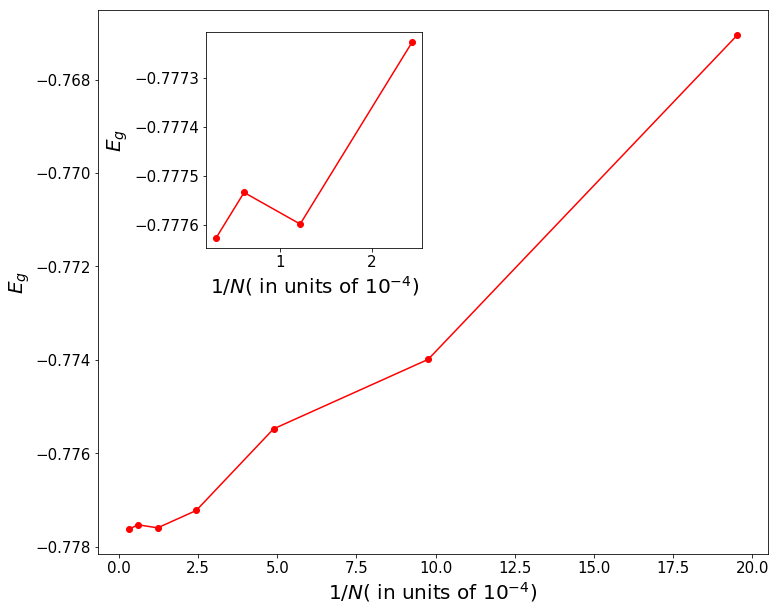

In [35]:
fig, ax = plt.subplots()
left, bottom, width, height = [0.25, 0.55, 0.25, 0.3]
plt.rcParams['figure.figsize'] = [12,10]
ax1 = fig.add_axes([left, bottom, width, height])
#plot for ground-state-energy per particle with inverse square root lattice size  	
ax.plot((1/N_latt[1:])/10**(-4),energyGSperParticle[1:], color='red',marker='o')
ax1.plot((1/N_latt[4:9])/10**(-4), energyGSperParticle[4:9],color='red',marker='o')
ax.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax.set_xlabel(r'$1/N$( in units of $10^{-4}$)',fontsize=20)
ax.set_ylabel(r'$E_{g}$',fontsize=20)
ax1.set_xlabel(r'$1/N$( in units of $10^{-4}$)',fontsize=20)
ax1.set_ylabel(r'$E_{g}$',fontsize=20)
plt.show()